### Analysis of Internal and External Data Sets for Spiritual Care

The code imports two essential libraries: `pandas` and `matplotlib.pyplot`. 
- `pandas` is widely used for handling and manipulating datasets, particularly for tasks like reading, writing, and cleaning data. It is imported with the alias `pd` for brevity.
- `matplotlib.pyplot`, imported as `plt`, is used to create various types of visualizations.

The next step involves reading a CSV file named `SpiritualGPT_150.csv` into a DataFrame object, `df_external`. This object serves as a structured representation of the data, similar to a spreadsheet or SQL table, allowing for easy manipulation and analysis.

Finally, the `print(df_external.columns)` command retrieves and displays the column names (headers) of the dataset. This step is essential for understanding the structure of the dataset and identifying the data available for further processing or visualization.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df_external = pd.read_csv('SpiritualGPT_150.csv')
print(df_external.columns)

The code defines a function, `clean_text`, to preprocess and clean text data by applying several transformations to make it suitable for analysis. It is then used to clean the `Note` column of a DataFrame, `df_external`.

### 1. Importing the `re` Module
The `re` module (regular expressions) is imported to handle advanced pattern matching and text replacements efficiently.

### 2. Function: `clean_text`
This function takes a single string of text as input and performs the following operations:
- **Convert to lowercase**: 
  - Ensures uniform text formatting.
- **Remove punctuation and numbers**: 
  - Uses the regular expression `[^A-Za-z\s]` to retain only letters and spaces.
- **Replace multiple spaces**: 
  - Replaces two or more consecutive spaces with a single space using the pattern `\s{2,}`.
- **Remove non-ASCII characters**: 
  - Removes any non-ASCII characters using the pattern `[^\x00-\x7F]+`.
- **Replace sequences of special characters**:
  - Replaces sequences of three or more non-alphanumeric characters with a single space using `[^a-zA-Z0-9\s]{3,}`.
- **Trim whitespace**:
  - Removes any leading or trailing spaces using `text.strip()`.

The cleaned text is then returned.


In [2]:
# Define a function to clean text data
import re  # Import the re module for regular expressions

def clean_text(text):
    
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation and numbers using regular expressions
    text = re.sub(r'[^A-Za-z\s]', '', text)
    # Replace 2 or more consecutive white spaces with 1 white space
    text = re.sub(r'\s{2,}', ' ', text)
    
    # Remove non-ASCII characters
    text = re.sub(r'[^\x00-\x7F]+', ' ', text)
    
    # Replace 3 or more consecutive non-alphanumeric characters with 1 white space
    text = re.sub(r'[^a-zA-Z0-9\s]{3,}', ' ', text)
    
    # Replace 2 or more consecutive white spaces with 1 white space
    text = re.sub(r'\s{2,}', ' ', text)
    
    
    return text.strip()  # Trim whitespace from beginning and end

# Clean the 'SentText' column in-place
df_external['Note'] = df_external['Note'].apply(clean_text)
df_external.fillna(0, inplace=True)

In [48]:
# Count how many entries have more than 512 tokens in 'Note' without modifying df_external
count_external = df_external['Note'].apply(lambda x: len(str(x).split()) > 512).sum()
count_external

0

This code performs analysis and visualization on a DataFrame containing text data. It starts by importing necessary libraries: `pandas` for data manipulation, `matplotlib.pyplot` for visualization, and `seaborn` for enhanced plotting aesthetics. A copy of the original DataFrame (`df_external`) is created as `df1_external` to preserve the original data while performing analysis.

Three metrics are calculated for the `Note` column:
1. **Length of Each Note**: The number of characters in each note is calculated using the `.apply(len)` method and stored in a new column, `Length`.
2. **Number of Tokens in Each Note**: The notes are tokenized by splitting them on spaces, and the resulting token count is calculated and stored in the `Num_Tokens` column.
3. **Density of Each Note**: Density is computed as the ratio of the length of each note to its number of tokens (`Length / Num_Tokens`) and stored in the `Density` column.

Next, the code generates visualizations:
1. **Distribution of Note Lengths**: A histogram with a kernel density estimate (KDE) plot is created using `sns.distplot()` to show the frequency distribution of note lengths.
2. **Number of Tokens in Each Note**: A bar chart is plotted to visualize the number of tokens for each note. The x-axis represents the index of each note, and the y-axis represents the token count.
3. **Density of Notes**: A line plot is generated to illustrate the density of notes across their indices, helping to identify trends or anomalies in the density metric.

Each visualization uses `matplotlib` for figure creation and labels for better readability. This analysis helps in understanding the text data's characteristics and can guide further preprocessing or feature engineering steps.


/tmp/ipykernel_65/2482272999.py:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1_external['Length'], bins=20, kde=True)


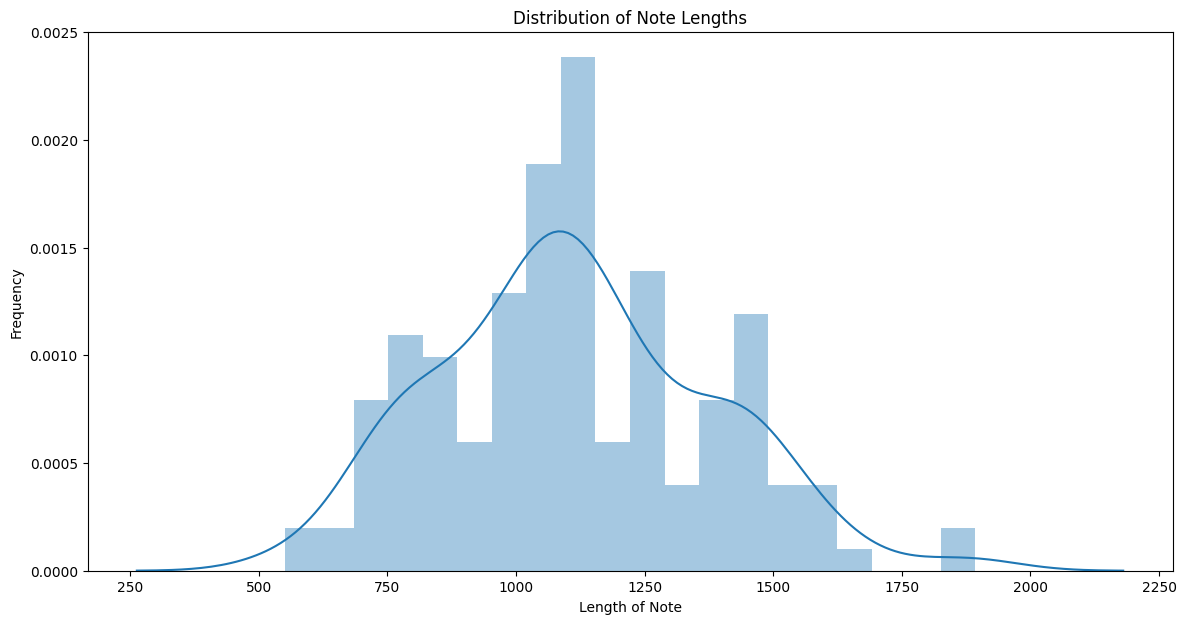

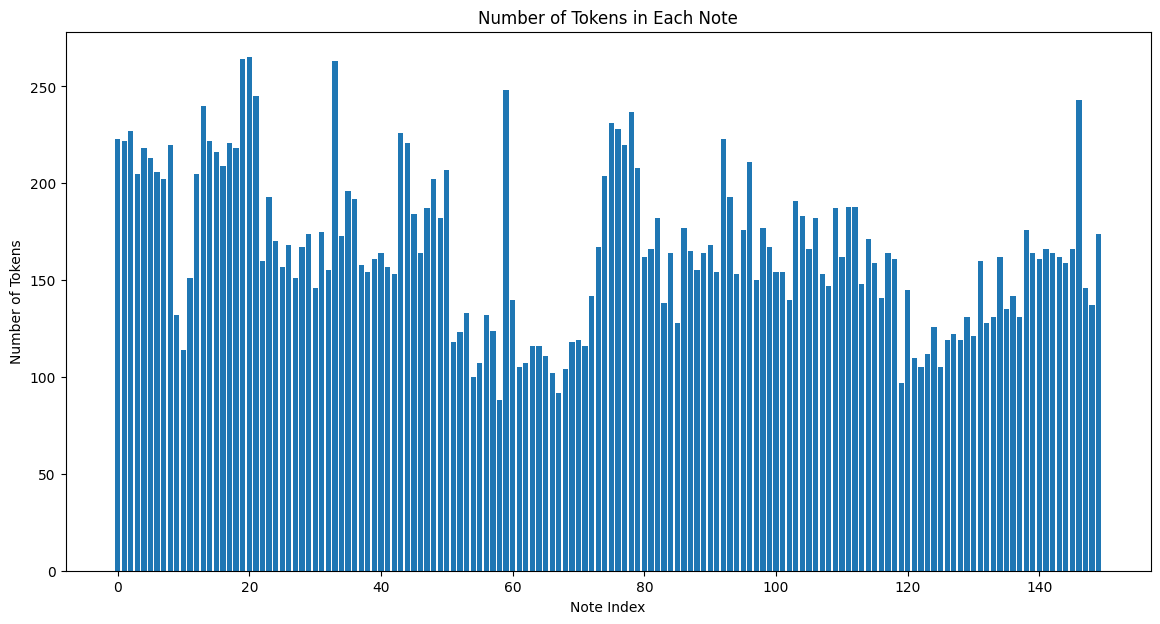

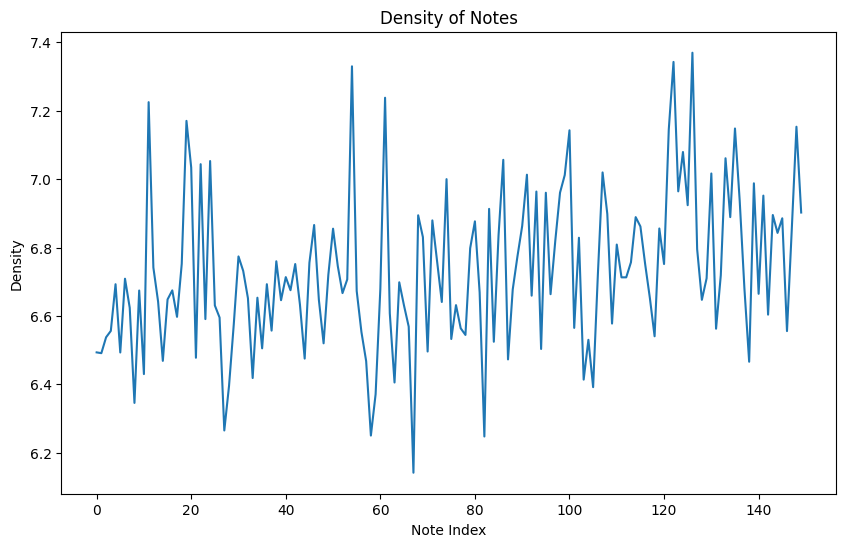

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_external is your DataFrame and 'Note' is the column with text data.

df1_external = df_external.copy()

# Calculate the length of each note
df1_external['Length'] = df1_external['Note'].apply(len)

# Calculate the number of tokens in each note (simple split by space)
df1_external['Num_Tokens'] = df1_external['Note'].apply(lambda x: len(x.split()))

# Calculate the density of each note (length / number of tokens)
df1_external['Density'] = df1_external['Length'] / df1_external['Num_Tokens']

# Visualizations
plt.figure(figsize=(14, 7))
sns.distplot(df1_external['Length'], bins=20, kde=True)
plt.title('Distribution of Note Lengths')
plt.xlabel('Length of Note')
plt.ylabel('Frequency')
plt.show()

# Number of tokens in each note
plt.figure(figsize=(14, 7))  # Increased figure size for better visibility
plt.bar(range(len(df1_external['Num_Tokens'])), df1_external['Num_Tokens'])
plt.title('Number of Tokens in Each Note')
plt.xlabel('Note Index')
plt.ylabel('Number of Tokens')
# Here we do not set xticks due to large number of rows
plt.show()

# Density of each note
plt.figure(figsize=(10, 6))
sns.lineplot(x=df_external.index, y=df1_external['Density'])
plt.title('Density of Notes')
plt.xlabel('Note Index')
plt.ylabel('Density')
plt.show()


This code snippet focuses on preparing and visualizing relationships within a dataset containing text data, particularly highlighting the relationship between the **length of text entries** and the **number of tokens** in each note.

Initially, the script calculates key metrics:
- The **length** of each note (total number of characters) is computed using `df1_external['Note'].apply(len)` and stored in the `Length` column.
- The **number of tokens** (words) in each note is determined by splitting the text on spaces (`x.split()`) and counting the resulting tokens. This is stored in the `Num_Tokens` column.
- The **density** of each note is calculated as the ratio of length to the number of tokens (`Length / Num_Tokens`). This metric provides insight into the complexity of the text, such as average word length or text density.

For visualization, a **scatter plot** is created to show the relationship between the `Length` and `Num_Tokens` columns:
- A matplotlib figure is set up with a size of 18x10 inches to provide a large canvas for visualizations.
- The `sns.scatterplot()` function from Seaborn plots `Length` on the x-axis and `Num_Tokens` on the y-axis. This visualization helps identify patterns, trends, or outliers in the dataset, such as texts that are unusually short or long relative to their token count.

Finally, the layout of the visualization is adjusted using `plt.tight_layout()` to ensure all elements are well-positioned within the figure, and the plot is displayed using `plt.show()`.


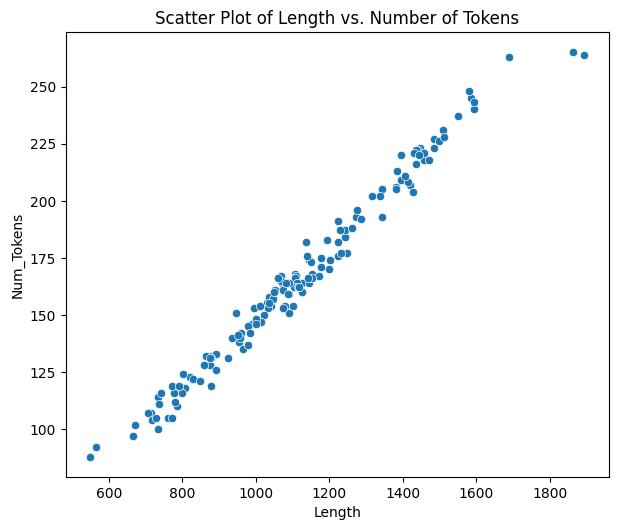

In [4]:
# We will create a series of visualizations to represent the dataset effectively.

# Before creating visualizations, let's ensure we have all the necessary calculations
df1_external['Length'] = df1_external['Note'].apply(len)
df1_external['Num_Tokens'] = df1_external['Note'].apply(lambda x: len(x.split()))
df1_external['Density'] = df1_external['Length'] / df1_external['Num_Tokens']

# Let's create each of the visualizations mentioned.

# Set up the matplotlib figure
plt.figure(figsize=(18, 10))

# Scatter Plot for Length vs. Number of Tokens
plt.subplot(2, 3, 3)
sns.scatterplot(x='Length', y='Num_Tokens', data=df1_external)
plt.title('Scatter Plot of Length vs. Number of Tokens')

# Adjust layout
plt.tight_layout()

plt.show()

# Explanation of the Python Code

This code calculates descriptive statistics for three metrics in the dataset: **length**, **number of tokens**, and **density**, then prints the results in a structured format for analysis.

The statistics for each metric are stored in dictionaries for easy access and organization.

1. **Length Statistics**:
   - The **minimum length** (`Min Length`) of the text entries is calculated using `df1_external['Length'].min()`.
   - The **maximum length** (`Max Length`) is calculated using `df1_external['Length'].max()`.
   - The **range of lengths** (`Length Range`) is derived as the difference between the maximum and minimum lengths (`max - min`).

2. **Token Statistics**:
   - The **minimum number of tokens** (`Min Num_Tokens`) in the text entries is calculated using `df1_external['Num_Tokens'].min()`.
   - The **maximum number of tokens** (`Max Num_Tokens`) is calculated using `df1_external['Num_Tokens'].max()`.
   - The **range of token counts** (`Num_Tokens Range`) is the difference between the maximum and minimum token counts (`max - min`).

3. **Density Statistics**:
   - The **minimum density** (`Min Density`) is calculated using `df1_external['Density'].min()`.
   - The **maximum density** (`Max Density`) is calculated using `df1_external['Density'].max()`.
   - The **range of densities** (`Density Range`) is the difference between the maximum and minimum densities (`max - min`).

Finally, the code prints these statistics in a clear, human-readable format:
- It iterates through the dictionaries (`length_stats`, `token_stats`, `density_stats`) using a `for` loop, displaying each key-value pair. This output provides a quick summary of the dataset's characteristics, useful for understanding the variability and extremes in text properties.


In [5]:
length_stats = {
    'Min Length': df1_external['Length'].min(),
    'Max Length': df1_external['Length'].max(),
    'Length Range': df1_external['Length'].max() - df1_external['Length'].min()
}

token_stats = {
    'Min Num_Tokens': df1_external['Num_Tokens'].min(),
    'Max Num_Tokens': df1_external['Num_Tokens'].max(),
    'Num_Tokens Range': df1_external['Num_Tokens'].max() - df1_external['Num_Tokens'].min()
}

density_stats = {
    'Min Density': df1_external['Density'].min(),
    'Max Density': df1_external['Density'].max(),
    'Density Range': df1_external['Density'].max() - df1_external['Density'].min()
}

# Now we print all the statistics including density
print('Length Statistics:')
for key, value in length_stats.items():
    print(f"{key}: {value}")

print('\nNumber of Tokens Statistics:')
for key, value in token_stats.items():
    print(f"{key}: {value}")

print('\nDensity Statistics:')
for key, value in density_stats.items():
    print(f"{key}: {value}")


Length Statistics:
Min Length: 550
Max Length: 1893
Length Range: 1343

Number of Tokens Statistics:
Min Num_Tokens: 88
Max Num_Tokens: 265
Num_Tokens Range: 177

Density Statistics:
Min Density: 6.141304347826087
Max Density: 7.369747899159663
Density Range: 1.2284435513335765


In [54]:
df_external.to_csv('df_external.csv', index=False)

This code snippet demonstrates how to load a dataset, rename a column, and inspect its structure.

- The **`pandas` library** is imported with the alias `pd`, which is commonly used for data manipulation tasks.

- The dataset is loaded using `pd.read_csv("SpiritualCorpus_716.csv")`, which reads the CSV file `SpiritualCorpus_716.csv` into a pandas DataFrame named `df`.

- The column `SentText` is renamed to `Note` using the `.rename()` method. This is done by passing a dictionary to the `columns` parameter, where the key represents the old column name (`'SentText'`) and the value represents the new column name (`'Note'`).

- Finally, `print(df.columns)` displays the updated column names of the DataFrame in the console, allowing you to confirm the renaming operation was successful.


In [7]:
import pandas as pd 
df = pd.read_csv("SpiritualCorpus_716.csv")
df = df.rename(columns={
    'SentText': 'Note'})
print(df.columns)

Index(['CorpusID', 'NoteID', 'SentID', 'Note', 'Keyterms', 'Spiritual',
       'Existential', 'Religious', 'Values'],
      dtype='object')


This code defines a function to clean and preprocess text data, then applies it to the `Note` column of a DataFrame (`df`).

- **Importing the `re` module**: The `re` module is imported to utilize regular expressions for advanced text pattern matching and replacement operations.

- **Function: `clean_text`**:
  - Converts the input text to **lowercase** to ensure uniformity.
  - Removes **punctuation and numbers** using the regular expression `[^A-Za-z\s]`, which keeps only letters and spaces.
  - Collapses multiple consecutive spaces into a single space using `\s{2,}`.
  - Removes **non-ASCII characters** using `[^\x00-\x7F]+`, ensuring compatibility with standard text encoding.
  - Replaces sequences of **three or more consecutive non-alphanumeric characters** with a single space using `[^a-zA-Z0-9\s]{3,}`.
  - Collapses multiple consecutive spaces again (if any remain after the previous step).
  - Strips leading and trailing whitespace from the text using `.strip()`.

- **Applying the Cleaning Function**:
  - `df['Note'] = df['Note'].apply(clean_text)`: Applies the `clean_text` function to every entry in the `Note` column and updates the column in place.

- **Handling Missing Data**:
  - `df.fillna(0, inplace=True)`: Replaces all `NaN` (missing) values in the DataFrame with `0` to prevent issues during subsequent analysis.

This cleaning process ensures that the `Note` column is free from unnecessary characters, excessive spaces, and missing values, making it ready for further analysis or modeling.


In [8]:
# Define a function to clean text data
import re  # Import the re module for regular expressions

def clean_text(text):
    
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation and numbers using regular expressions
    text = re.sub(r'[^A-Za-z\s]', '', text)
    # Replace 2 or more consecutive white spaces with 1 white space
    text = re.sub(r'\s{2,}', ' ', text)
    
    # Remove non-ASCII characters
    text = re.sub(r'[^\x00-\x7F]+', ' ', text)
    
    # Replace 3 or more consecutive non-alphanumeric characters with 1 white space
    text = re.sub(r'[^a-zA-Z0-9\s]{3,}', ' ', text)
    
    # Replace 2 or more consecutive white spaces with 1 white space
    text = re.sub(r'\s{2,}', ' ', text)
    
    
    return text.strip()  # Trim whitespace from beginning and end

# Clean the 'SentText' column in-place
df['Note'] = df['Note'].apply(clean_text)
df.fillna(0, inplace=True)

/tmp/ipykernel_65/2270844440.py:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['Length'], bins=20, kde=True)


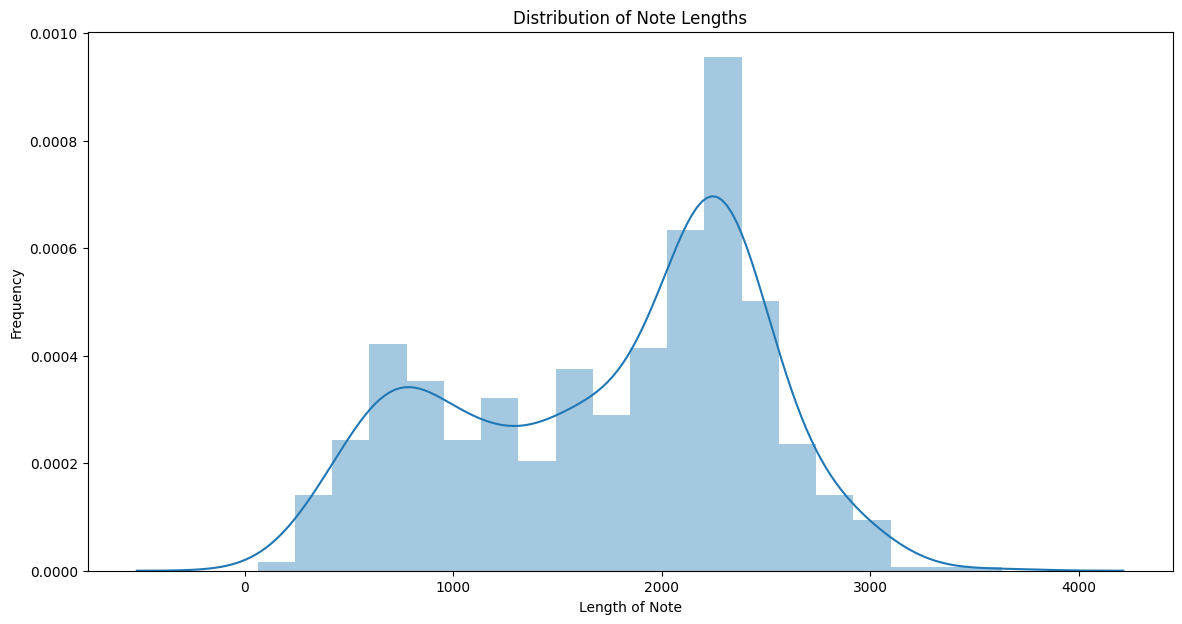

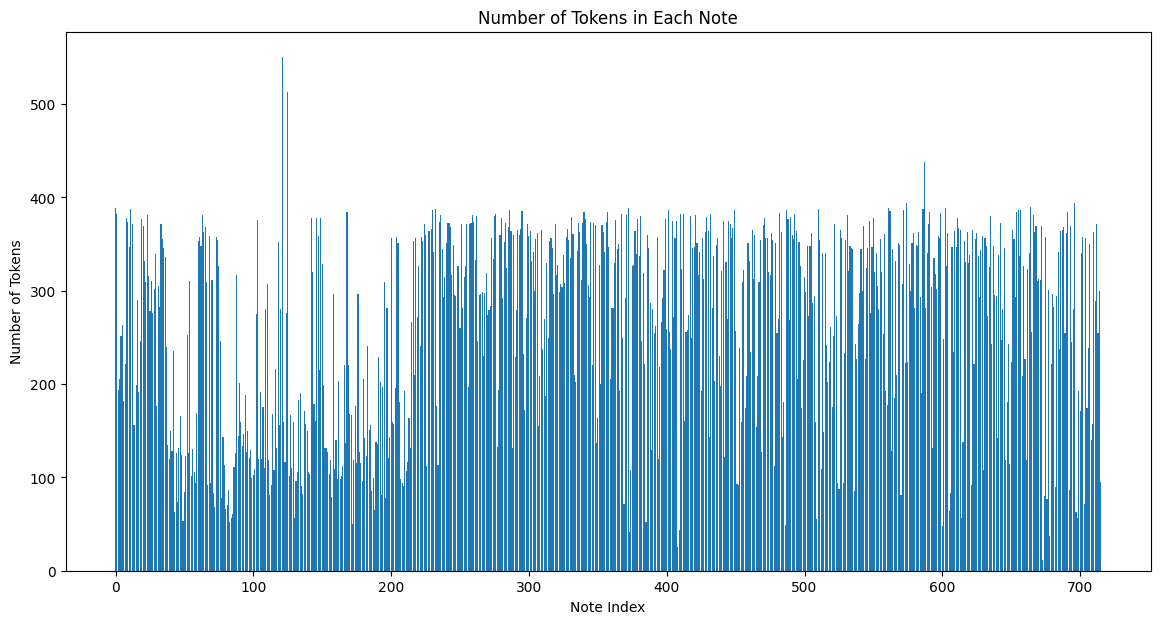

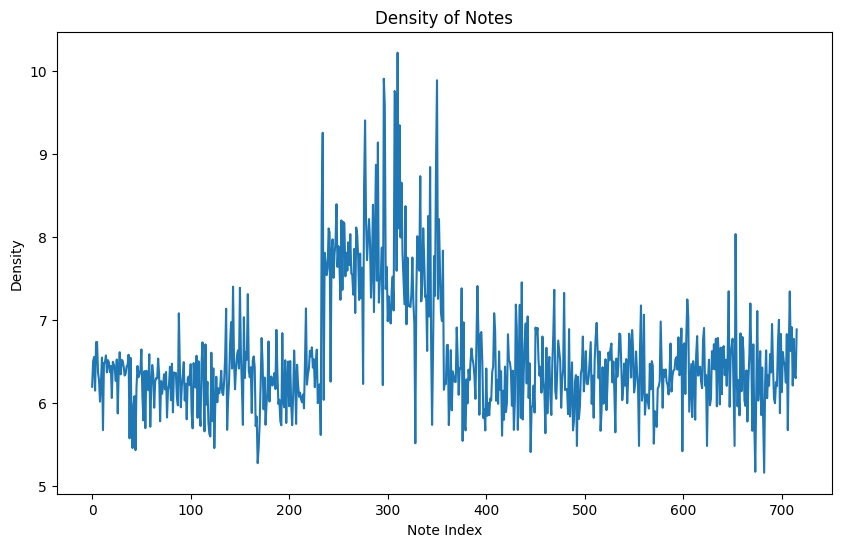

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy

df1 = copy.copy(df)

# Assuming df_external is your DataFrame and 'Note' is the column with text data.

# Calculate the length of each note
df1['Length'] = df1['Note'].apply(len)

# Calculate the number of tokens in each note (simple split by space)
df1['Num_Tokens'] = df1['Note'].apply(lambda x: len(x.split()))

# Calculate the density of each note (length / number of tokens)
df1['Density'] = df1['Length'] / df1['Num_Tokens']

# Visualizations
plt.figure(figsize=(14, 7))
sns.distplot(df1['Length'], bins=20, kde=True)
plt.title('Distribution of Note Lengths')
plt.xlabel('Length of Note')
plt.ylabel('Frequency')
plt.show()

# Number of tokens in each note
plt.figure(figsize=(14, 7))  # Increased figure size for better visibility
plt.bar(range(len(df1['Num_Tokens'])), df1['Num_Tokens'])
plt.title('Number of Tokens in Each Note')
plt.xlabel('Note Index')
plt.ylabel('Number of Tokens')
# Here we do not set xticks due to large number of rows
plt.show()

# Density of each note
plt.figure(figsize=(10, 6))
sns.lineplot(x=df1.index, y=df1['Density'])
plt.title('Density of Notes')
plt.xlabel('Note Index')
plt.ylabel('Density')
plt.show()

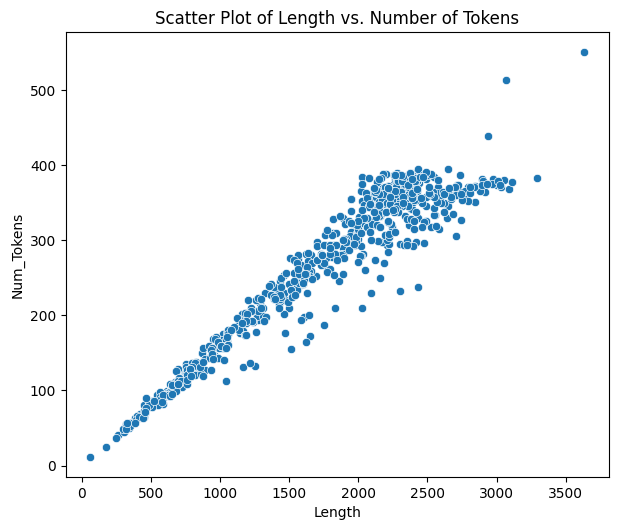

In [63]:
# We will create a series of visualizations to represent the dataset effectively.

# Before creating visualizations, let's ensure we have all the necessary calculations
df1['Length'] = df1['Note'].apply(len)
df1['Num_Tokens'] = df1['Note'].apply(lambda x: len(x.split()))
df1['Density'] = df1['Length'] / df1['Num_Tokens']

# Let's create each of the visualizations mentioned.

# Set up the matplotlib figure
plt.figure(figsize=(18, 10))

# Scatter Plot for Length vs. Number of Tokens
plt.subplot(2, 3, 3)
sns.scatterplot(x='Length', y='Num_Tokens', data=df1)
plt.title('Scatter Plot of Length vs. Number of Tokens')

# Adjust layout
plt.tight_layout()

plt.show()

In [65]:
length_stats = {
    'Min Length': df1['Length'].min(),
    'Max Length': df1['Length'].max(),
    'Length Range': df1['Length'].max() - df1['Length'].min()
}

token_stats = {
    'Min Num_Tokens': df1['Num_Tokens'].min(),
    'Max Num_Tokens': df1['Num_Tokens'].max(),
    'Num_Tokens Range': df1['Num_Tokens'].max() - df1['Num_Tokens'].min()
}

density_stats = {
    'Min Density': df1['Density'].min(),
    'Max Density': df1['Density'].max(),
    'Density Range': df1['Density'].max() - df1['Density'].min()
}

# Now we print all the statistics including density
print('Length Statistics:')
for key, value in length_stats.items():
    print(f"{key}: {value}")

print('\nNumber of Tokens Statistics:')
for key, value in token_stats.items():
    print(f"{key}: {value}")

print('\nDensity Statistics:')
for key, value in density_stats.items():
    print(f"{key}: {value}")

Length Statistics:
Min Length: 62
Max Length: 3632
Length Range: 3570

Number of Tokens Statistics:
Min Num_Tokens: 12
Max Num_Tokens: 550
Num_Tokens Range: 538

Density Statistics:
Min Density: 5.155555555555556
Max Density: 10.222689075630251
Density Range: 5.067133520074695


In [66]:
df.to_csv('df.csv', index=False)